# DISNEYLAND REVIEWS - PRÁCTICA

## **Swietenia Naomi Medina Gasca**

### 20 de junio de 2025

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("arushchillar/disneyland-reviews")

print("Path to dataset files:", path)

100%|██████████| 11.1M/11.1M [00:00<00:00, 55.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arushchillar/disneyland-reviews/versions/1


In [ ]:
#manipular el archivo descargado
df=pd.read_csv(path+"/DisneylandReviews.csv", encoding='latin1')
#este metodo es para imprimir los primeros 5 registros
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
#Obtener información del DT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
#revisar si existen datos nulos
df.isnull().sum()

,0
Review_ID,0
Rating,0
Year_Month,0
Reviewer_Location,0
Review_Text,0
Branch,0


In [ ]:
#borrar espacios en blanco y convertimos el texto a minusculas
df['Review_Text']=df['Review_Text'].str.strip().str.lower()

# Promedio calificaciones por parque

In [ ]:
df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)

,Rating
Branch,
Disneyland_California,4.405339
Disneyland_HongKong,4.204158
Disneyland_Paris,3.960088


# Distribución por calificaciones

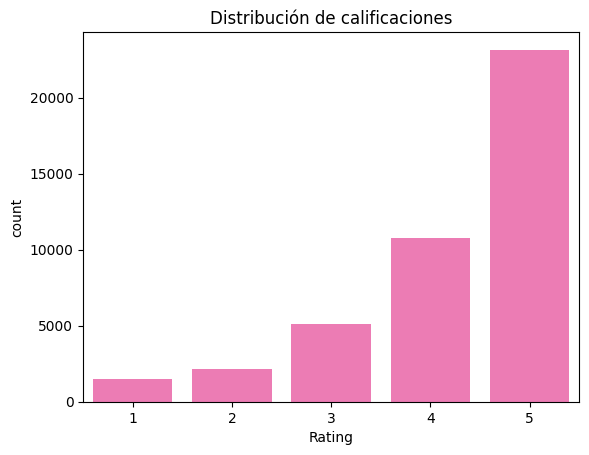

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#creamos la gráfica de barras
sns.countplot(x='Rating',data=df, color='hotpink')
plt.title('Distribución de calificaciones')
plt.show()

# La nube de reseñas

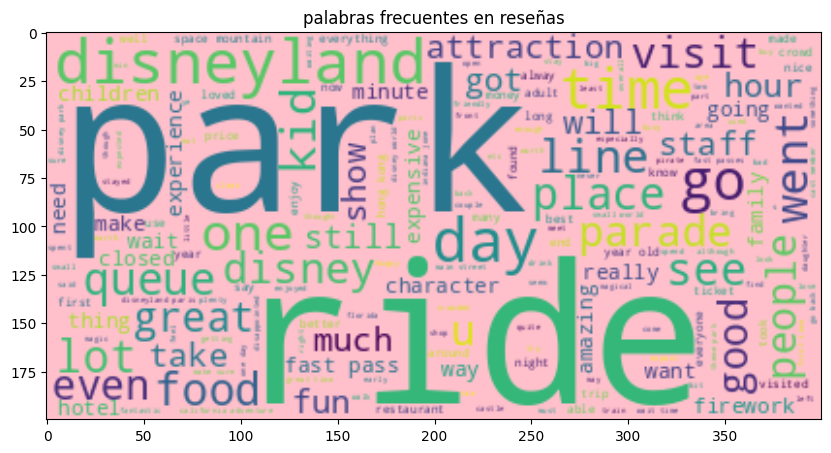

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

resena=" ".join(df['Review_Text'].dropna())
wc=WordCloud(background_color='pink').generate(resena)

plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='BILINEAR')
plt.title("palabras frecuentes en reseñas")
plt.show()